# 📈 Análisis de Escenarios

Este notebook compara los resultados bajo diferentes escenarios económicos.


In [1]:
import sys
import os
sys.path.append('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
from src.sensitivity_analysis import analyze_sensitivity, compare_scenarios, compare_portfolios

# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

# Cargar configuración
with open('../config/settings.yaml', 'r') as f:
    config = yaml.safe_load(f)


## 1. Ejecutar Análisis de Sensibilidad


In [2]:
# Ejecutar análisis completo
analysis_results = analyze_sensitivity('../config/settings.yaml')


📊 ANÁLISIS DE SENSIBILIDAD Y ESCENARIOS

1. Cargando resultados de simulaciones...

2. Comparando escenarios económicos...
  ✅ Guardado en: results/tables/scenario_comparison.csv

3. Comparando carteras por escenario...
  ✅ base: results/tables/portfolio_comparison_base.csv
  ✅ optimistic: results/tables/portfolio_comparison_optimistic.csv
  ✅ pessimistic: results/tables/portfolio_comparison_pessimistic.csv

📈 RESUMEN DE COMPARACIÓN DE ESCENARIOS
portfolio    scenario  survival_rate  mean_final_value  percentile_5  percentile_95
cartera_1        base          40.81      23088.167261           0.0  117183.593131
cartera_1  optimistic          48.99      28369.653062           0.0  130283.551858
cartera_1 pessimistic          19.83      11301.715746           0.0   74494.848208
cartera_2        base          41.52      14192.332041           0.0   69615.204811
cartera_2  optimistic          52.69      19280.379386           0.0   81796.964624
cartera_2 pessimistic          14.90       44

## 2. Comparación de Escenarios


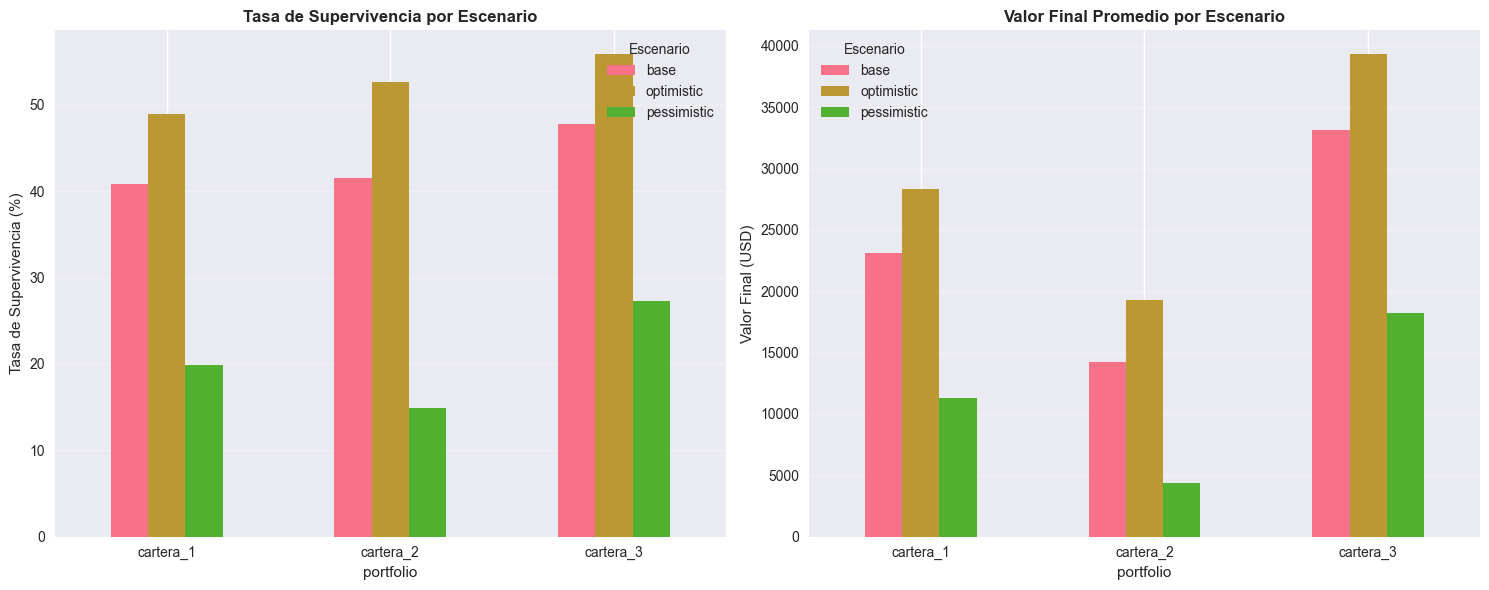

In [3]:
if analysis_results:
    scenario_comparison = analysis_results['scenario_comparison']
    
    # Visualizar comparación
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Tasa de supervivencia
    pivot_survival = scenario_comparison.pivot(index='portfolio', columns='scenario', values='survival_rate')
    pivot_survival.plot(kind='bar', ax=axes[0], rot=0)
    axes[0].set_title('Tasa de Supervivencia por Escenario', fontweight='bold')
    axes[0].set_ylabel('Tasa de Supervivencia (%)')
    axes[0].legend(title='Escenario')
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Valor final promedio
    pivot_value = scenario_comparison.pivot(index='portfolio', columns='scenario', values='mean_final_value')
    pivot_value.plot(kind='bar', ax=axes[1], rot=0)
    axes[1].set_title('Valor Final Promedio por Escenario', fontweight='bold')
    axes[1].set_ylabel('Valor Final (USD)')
    axes[1].legend(title='Escenario')
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
